In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("../data/cleaned_data/clean_data.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449024 entries, 0 to 449023
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Wahlperiode           449024 non-null  int64 
 1   Sitzungnr             449024 non-null  int64 
 2   Abstimmnr             449024 non-null  int64 
 3   Fraktion/Gruppe       449024 non-null  object
 4   Name                  449024 non-null  object
 5   Vorname               449024 non-null  object
 6   ja                    449024 non-null  int64 
 7   nein                  449024 non-null  int64 
 8   Enthaltung            449024 non-null  int64 
 9   ungültig              449024 non-null  int64 
 10  nichtabgegeben        449024 non-null  int64 
 11  Bezeichnung           449024 non-null  object
 12  Abstimmungstag        449024 non-null  object
 13  Abstimmungsthema      449024 non-null  object
 14  Periode               449024 non-null  int64 
 15  Gesamtzahl der Sitze  

In [4]:
df["Abstimmungstag"] = pd.to_datetime(df["Abstimmungstag"])

# Wie ist die Verteilung der Ja- und Nein-Stimmen pro Fraktion?

In [5]:
df_vote_distribution =  df.groupby(["Fraktion/Gruppe"], as_index=False).agg({"ja": "sum", "nein":"sum"})

In [6]:
fig = px.bar(
    df_vote_distribution,
    "Fraktion/Gruppe",
    ["ja", "nein"],
    barmode="group",
    labels={"value": "Anzahl"}
)

fig.update_layout(title="Absolute Verteilung der Stimmen pro Fraktion")
fig.show()

In [7]:
df_percentage = df_vote_distribution.copy()
df_percentage[["ja", "nein"]] = df_percentage[["ja", "nein"]].div(df_percentage[["ja", "nein"]].sum(axis=1), axis=0) * 100

fig = px.bar(
    df_percentage,
    x="Fraktion/Gruppe",
    y=["ja", "nein"],
    barmode="group",
    labels={"value": "Anteil (%)"},
    text_auto=".1f"
)

fig.update_layout(title="Prozentuale Verteilung der Stimmen pro Fraktion")
fig.show()


# Welche Fraktion zeigt die höchste Fraktionsdisziplin? In welchen Fraktionen gibt es die meisten "Abweichler"?

In [8]:
df.head()

,Wahlperiode,Sitzungnr,Abstimmnr,Fraktion/Gruppe,Name,Vorname,ja,nein,Enthaltung,ungültig,...,Abstimmungsthema,Periode,Gesamtzahl der Sitze,CDU/CSU,SPD,FDP,GRUENE,LINKE,AfD,Sonstige
0,20,63,1,SPD,Abdi,Sanae,0,1,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
1,20,63,1,SPD,Ahmetovic,Adis,0,1,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
2,20,63,1,SPD,Alabali-Radovan,Reem,0,0,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
3,20,63,1,SPD,Andres,Dagmar,0,1,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
4,20,63,1,SPD,Annen,Niels,0,0,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1


In [9]:
deveators_df = df.groupby(["Fraktion/Gruppe", "Abstimmungsthema"], as_index=False).agg({"ja":"sum", "nein":"sum", "Enthaltung":"sum", "nichtabgegeben": "sum"}).sort_values("Abstimmungsthema")

In [10]:
deveators_df.head(10)

,Fraktion/Gruppe,Abstimmungsthema,ja,nein,Enthaltung,nichtabgegeben
2659,SPD,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,138,0,0,8
3273,Sonstige,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,0,1,0
1007,FDP,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,89,0,4
1439,GRUENE,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,64,0,0,4
2053,LINKE,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,0,65,10
393,CDU/CSU,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,230,0,7
1440,GRUENE,"17_10059 und 17_11093, Abkommen zwischen Deuts...",0,64,0,4
1008,FDP,"17_10059 und 17_11093, Abkommen zwischen Deuts...",89,0,0,4
2660,SPD,"17_10059 und 17_11093, Abkommen zwischen Deuts...",0,132,1,13
2054,LINKE,"17_10059 und 17_11093, Abkommen zwischen Deuts...",0,60,0,16


In [37]:
deveators_df["max_stimmen"] = deveators_df[["ja", "nein", "Enthaltung", "nichtabgegeben"]].sum(axis=1)


In [38]:
deveators_df["ja_abweichung"] = deveators_df["ja"] / deveators_df["max_stimmen"]
deveators_df["nein_abweichung"] = deveators_df["nein"] / deveators_df["max_stimmen"]
deveators_df["Enthaltung_abweichung"] = deveators_df["Enthaltung"] / deveators_df["max_stimmen"]

In [39]:
deveators_df

,Fraktion/Gruppe,Abstimmungsthema,ja,nein,Enthaltung,nichtabgegeben,max_stimmen,ja_abweichung,nein_abweichung,Enthaltung_abweichung,dominanz
2659,SPD,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,138,0,0,8,146,0.945205,0.000000,0.000000,1.00
3273,Sonstige,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,0,1,0,1,0.000000,0.000000,1.000000,1.00
1007,FDP,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,89,0,4,93,0.000000,0.956989,0.000000,1.00
1439,GRUENE,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,64,0,0,4,68,0.941176,0.000000,0.000000,1.00
2053,LINKE,0: Antrag Bündnis 90 _ Die Grünen - Entwurf ei...,0,0,65,10,75,0.000000,0.000000,0.866667,1.00
...,...,...,...,...,...,...,...,...,...,...,...
367,AfD,Übereinkommen über ein Einheitliches Patentger...,1,72,2,14,89,0.011236,0.808989,0.022472,0.96
1438,FDP,Übereinkommen über ein Einheitliches Patentger...,77,0,0,3,80,0.962500,0.000000,0.000000,1.00
3272,SPD,Übereinkommen über ein Einheitliches Patentger...,138,0,0,14,152,0.907895,0.000000,0.000000,1.00
1006,CDU/CSU,Übereinkommen über ein Einheitliches Patentger...,234,0,0,12,246,0.951220,0.000000,0.000000,1.00


In [40]:
deveators_df["dominanz"] = deveators_df[["ja", "nein", "Enthaltung"]].max(axis=1) / deveators_df["max_stimmen"]


In [41]:
deveators_df.groupby("Fraktion/Gruppe", as_index=False).agg({"dominanz":"mean"}).sort_values("dominanz", ascending=False)

,Fraktion/Gruppe,dominanz
2,CDU/CSU,0.905103
3,FDP,0.888430
6,SPD,0.879831
4,GRUENE,0.879064
0,AfD,0.835983
5,LINKE,0.813294
1,BSW,0.780000
7,Sonstige,0.557313


# Wie hoch ist die Anwesenheitsquote der verschiedenen Fraktionen?

In [16]:
df.head()

,Wahlperiode,Sitzungnr,Abstimmnr,Fraktion/Gruppe,Name,Vorname,ja,nein,Enthaltung,ungültig,...,Abstimmungsthema,Periode,Gesamtzahl der Sitze,CDU/CSU,SPD,FDP,GRUENE,LINKE,AfD,Sonstige
0,20,63,1,SPD,Abdi,Sanae,0,1,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
1,20,63,1,SPD,Ahmetovic,Adis,0,1,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
2,20,63,1,SPD,Alabali-Radovan,Reem,0,0,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
3,20,63,1,SPD,Andres,Dagmar,0,1,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1
4,20,63,1,SPD,Annen,Niels,0,0,0,0,...,GKV-Finanzstabilisierungsgesetz,2021,736,197,206,92,118,39,83,1


In [17]:
presence_df = df.groupby("Fraktion/Gruppe").agg({"ja": "sum", "nein": "sum", "Enthaltung": "sum", "ungültig": "sum", "nichtabgegeben": "sum"})
presence_df

,ja,nein,Enthaltung,ungültig,nichtabgegeben
Fraktion/Gruppe,,,,,
AfD,7976,18717,2080,0,4665
BSW,60,118,19,0,53
CDU/CSU,96114,56126,708,0,13631
FDP,21485,12196,1731,0,3675
GRUENE,26654,15625,4338,0,4718
LINKE,10001,19378,3699,0,6364
SPD,70935,33340,1308,0,10926
Sonstige,437,949,239,0,759


In [18]:
presence_df["stimmen_gesamt"] = presence_df.sum(axis=1)

In [19]:
presence_df = presence_df.reset_index()
presence_df

,Fraktion/Gruppe,ja,nein,Enthaltung,ungültig,nichtabgegeben,stimmen_gesamt
0,AfD,7976,18717,2080,0,4665,33438
1,BSW,60,118,19,0,53,250
2,CDU/CSU,96114,56126,708,0,13631,166579
3,FDP,21485,12196,1731,0,3675,39087
4,GRUENE,26654,15625,4338,0,4718,51335
5,LINKE,10001,19378,3699,0,6364,39442
6,SPD,70935,33340,1308,0,10926,116509
7,Sonstige,437,949,239,0,759,2384


In [20]:
rows = 2
cols = 4
subplot_titles = presence_df["Fraktion/Gruppe"]

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=subplot_titles,
    specs=[[{"type": "pie"}] * cols] * rows
)

for i, row in presence_df.iterrows():
    r = (i // cols) + 1  # Zeilenindex
    c = (i % cols) + 1   # Spaltenindex
    
    fig.add_trace(
        go.Pie(
            labels=["Anwesend", "Abwesend"],
            values=[row["stimmen_gesamt"] - row["nichtabgegeben"], row["nichtabgegeben"]],
            name=row["Fraktion/Gruppe"]
        ),
        row=r, col=c
    )
    
fig.update_layout(
    title_text="Anwesenheit nach Fraktion/Gruppe",
    showlegend=True
)

# Zeige die Figur
fig.show()

In [55]:
df["Abstimmungstag"]

0        2022-10-20
1        2022-10-20
2        2022-10-20
3        2022-10-20
4        2022-10-20
            ...    
449019   2021-03-25
449020   2021-03-25
449021   2021-03-25
449022   2021-03-25
449023   2021-03-25
Name: Abstimmungstag, Length: 449024, dtype: datetime64[ns]

# Hat sich die Anwesenheitsquote über die Zeit verändert?

In [66]:
presence_df_overtime = df.groupby(["Wahlperiode", "Fraktion/Gruppe"]).agg({"ja": "sum", "nein": "sum", "Enthaltung": "sum", "ungültig": "sum", "nichtabgegeben": "sum", "Abstimmungstag": "first"})

In [67]:
presence_df_overtime["stimmen_gesamt"] = presence_df_overtime.sum(axis=1, numeric_only=True)
presence_df_overtime["stimmen_abgegeben"] = presence_df_overtime["stimmen_gesamt"] - presence_df_overtime["nichtabgegeben"]
presence_df_overtime["Anwesenheitsquote"] = presence_df_overtime["stimmen_abgegeben"] / presence_df_overtime["stimmen_gesamt"] * 100
presence_df_overtime = presence_df_overtime.reset_index()

In [68]:
presence_df_overtime = presence_df_overtime[presence_df_overtime["Abstimmungstag"] < pd.to_datetime("2026-01-01")]

In [69]:
presence_df_overtime

,Wahlperiode,Fraktion/Gruppe,ja,nein,Enthaltung,ungültig,nichtabgegeben,Abstimmungstag,stimmen_gesamt,stimmen_abgegeben,Anwesenheitsquote
0,17,CDU/CSU,7517,6708,48,0,895,2012-12-13,15168,14273,94.099420
1,17,FDP,2910,2610,23,0,409,2012-12-13,5952,5543,93.128360
2,17,GRUENE,2582,938,472,0,360,2012-12-13,4352,3992,91.727941
3,17,LINKE,1355,2021,612,0,832,2012-12-13,4820,3988,82.738589
4,17,SPD,4967,2516,804,0,1057,2012-12-13,9344,8287,88.687928
5,17,Sonstige,13,21,9,0,0,2012-12-13,43,43,100.000000
6,18,CDU/CSU,38877,19571,111,0,4423,2013-11-28,62982,58559,92.977359
7,18,GRUENE,5485,4429,1722,0,1153,2013-11-28,12789,11636,90.984440
8,18,LINKE,3638,6486,1032,0,1834,2013-11-28,12990,11156,85.881447
9,18,SPD,23210,12324,389,0,3253,2013-11-28,39176,35923,91.696447


In [73]:
fig = px.bar(presence_df_overtime, x="Wahlperiode", y="Anwesenheitsquote", facet_col="Fraktion/Gruppe")

fig.show()

<Axes: xlabel='Fraktion/Gruppe', ylabel='Anwesenheitsquote'>

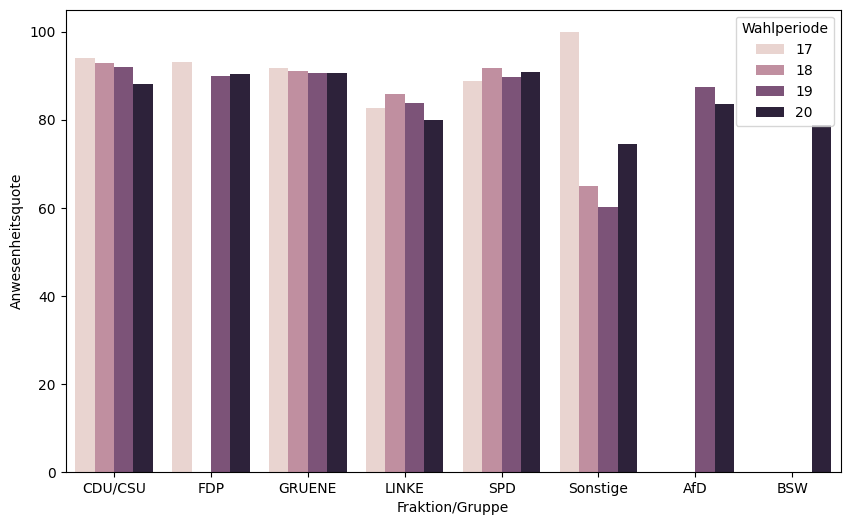

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=presence_df_overtime, 
    x="Fraktion/Gruppe", 
    y="Anwesenheitsquote", 
    hue="Wahlperiode"  # Farbliche Unterscheidung nach Fraktion
)

# Wie verhalten sich fraktionslose Abgeordnete bei Abstimmungen?

In [26]:
fraktionslos_df = df[df["Fraktion/Gruppe"] == "Sonstige"].groupby("Fraktion/Gruppe").agg({"ja": "sum", "nein":"sum", "Enthaltung":"sum", "nichtabgegeben":"sum"})

In [27]:
fraktionslos_df

,ja,nein,Enthaltung,nichtabgegeben
Fraktion/Gruppe,,,,
Sonstige,437,949,239,759


In [28]:
df_long = fraktionslos_df.reset_index().melt(id_vars=["Fraktion/Gruppe"],
                                             var_name="Abstimmung",
                                             value_name="Anzahl")

df_long

,Fraktion/Gruppe,Abstimmung,Anzahl
0,Sonstige,ja,437
1,Sonstige,nein,949
2,Sonstige,Enthaltung,239
3,Sonstige,nichtabgegeben,759


In [29]:
fig = px.pie(df_long,
             names="Abstimmung",
             values="Anzahl",
             title="Abstimmungsergebnis der Gruppe Sonstige")

fig.show()

# Welche Abgeordneten fehlen besonders häufig bei Abstimmungen?

In [30]:
df.columns

Index(['Wahlperiode', 'Sitzungnr', 'Abstimmnr', 'Fraktion/Gruppe', 'Name',
       'Vorname', 'ja', 'nein', 'Enthaltung', 'ungültig', 'nichtabgegeben',
       'Bezeichnung', 'Abstimmungstag', 'Abstimmungsthema', 'Periode',
       'Gesamtzahl der Sitze', 'CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE',
       'AfD', 'Sonstige'],
      dtype='object')

In [96]:
delegated_df = df.groupby(["Bezeichnung"]).agg({"ja": "sum", "nein":"sum", "Enthaltung":"sum", "nichtabgegeben":"sum"})
delegated_df

,ja,nein,Enthaltung,nichtabgegeben
Bezeichnung,,,,
Achim Post (Minden),375,167,1,51
Adis Ahmetovic,103,34,0,20
Agnes Alpers,20,33,9,70
Agnes Brugger,38,12,7,7
Agnes Krumwiede,27,12,0,25
...,...,...,...,...
Yvonne Ploetz,16,23,8,17
Zaklin Nastic,95,211,38,47
Zeki Gökhan,0,3,0,0


In [100]:
delegated_df["relative_anwesenheit"] = (delegated_df.sum(axis=1) - delegated_df["nichtabgegeben"]) / delegated_df.sum(axis=1) 
delegated_df.sort_values("relative_anwesenheit", inplace=True)
delegated_df.head()

,ja,nein,Enthaltung,nichtabgegeben,relative_anwesenheit
Bezeichnung,,,,,
Silvia Schmidt (Eisleben),2,3,0,59,0.079249
Annette Schavan,3,0,0,18,0.148649
Dr. Angela Merkel,105,44,0,352,0.297822
Sahra Wagenknecht,5,12,2,45,0.300122
Sigmar Gabriel,81,38,1,257,0.318877


In [102]:
px.bar(delegated_df.head(20), x=delegated_df.head(20).index, y="relative_anwesenheit")

# Können Abstimmungsmuster erkannt werden, die auf Koalitionen oder Opposition hindeuten?

In [91]:
vote_patterns_df = df.groupby(by=['Abstimmungsthema', 'Fraktion/Gruppe']).agg({'Wahlperiode': 'first',
																  'ja':'sum',
                                                                  'nein':'sum',
                                                                  'Enthaltung':'sum',
                                                                  'nichtabgegeben': 'sum',
                                                                  'CDU/CSU': 'first',
                                                                  'SPD': 'first',
                                                                  'AfD': 'first',
                                                                  'GRUENE': 'first',
                                                                  'LINKE': 'first',
                                                                  'FDP': 'first',
                                                                  'LINKE': 'first',
                                                                  'Sonstige': 'first'})

vote_patterns_df["ja_relativ"] = vote_patterns_df["ja"] / (vote_patterns_df["ja"] + vote_patterns_df["nein"] + vote_patterns_df["Enthaltung"] + vote_patterns_df["nichtabgegeben"])
vote_patterns_df = vote_patterns_df.reset_index()

In [92]:
vote_pat_df = vote_patterns_df.pivot(index=["Abstimmungsthema", "Wahlperiode"], columns="Fraktion/Gruppe", values="ja_relativ").reset_index()

In [93]:
def heatmap_plot_period(df, period):
    corr_mat = vote_pat_df[vote_pat_df.reset_index()["Wahlperiode"] == period].drop(columns="Wahlperiode").corr(numeric_only=True)
    sns.heatmap(corr_mat, cmap="coolwarm", annot=True, fmt=".2f")
    plt.show()

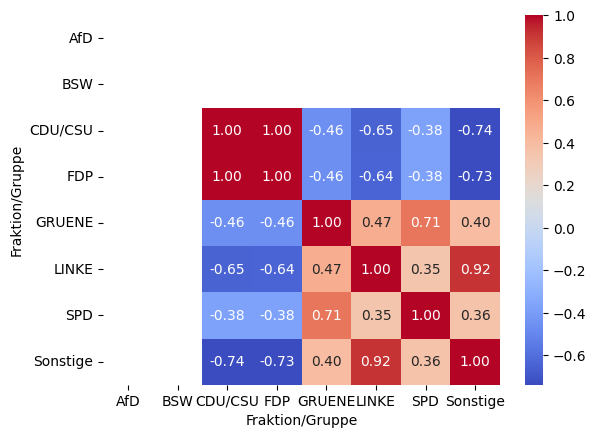

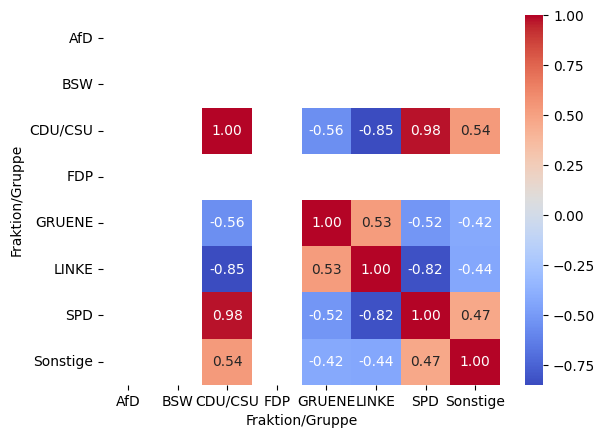

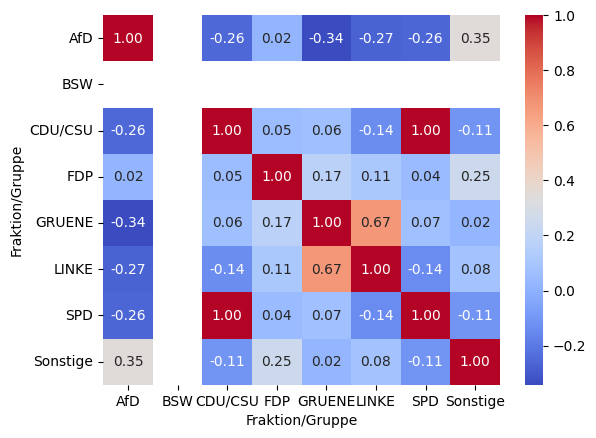

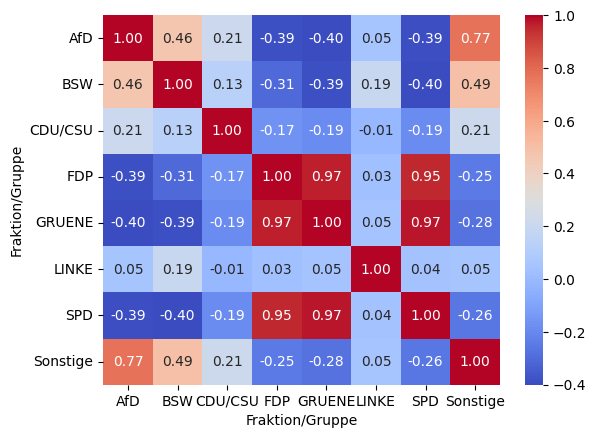

In [94]:
heatmap_plot_period(vote_pat_df, 17)
heatmap_plot_period(vote_pat_df, 18)
heatmap_plot_period(vote_pat_df, 19)
heatmap_plot_period(vote_pat_df, 20)

# Wie hat sich das Abstimmungsverhalten über mehrere Sitzungen hinweg entwickelt?

In [109]:
df["Abstimmungsthema"].value_counts()

Abstimmungsthema
Bundeswehreinsatz in Mali (MINUSMA)                                                                                                                         5464
Bundeswehreinsatz in Südsudan (UNMISS)                                                                                                                      4124
Bundeswehreinsatz in Darfur (UNAMID)                                                                                                                        3388
Bundeswehreinsatz in Kosovo (KFOR)                                                                                                                          3336
Bundeswehreinsatz in Afghanistan (Resolute Support)                                                                                                         2757
                                                                                                                                                            ... 
Bezahlbares Wohne

In [115]:
relevant_cols = ["ja", "nein", "Enthaltung", "nichtabgegeben", "Abstimmungstag", "Abstimmungsthema"]

mali_einsatz = df[df["Abstimmungsthema"] == "Bundeswehreinsatz in Mali (MINUSMA)"]

grouped_mali_einsatz = mali_einsatz[relevant_cols].groupby("Abstimmungstag").sum().sort_index().drop(columns="Abstimmungsthema")
grouped_mali_einsatz

,ja,nein,Enthaltung,nichtabgegeben
Abstimmungstag,,,,
2014-06-25,518,64,5,44
2015-06-19,528,65,4,34
2017-01-26,498,55,3,74
2017-12-12,504,158,4,43
2018-04-26,496,156,4,53
2019-05-09,485,153,2,69
2021-05-19,499,147,3,60
2023-05-26,374,265,1,96


In [116]:
px.line(grouped_mali_einsatz)